In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


**DATA**
1. Read the data using pandas
2. look at the data

In [35]:
data = pd.read_csv("/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


*Shape of the data*

In [36]:
data.shape

(215, 15)

Look for null values

In [37]:
data.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

**We have got null values for salary alone**

In [38]:
data.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

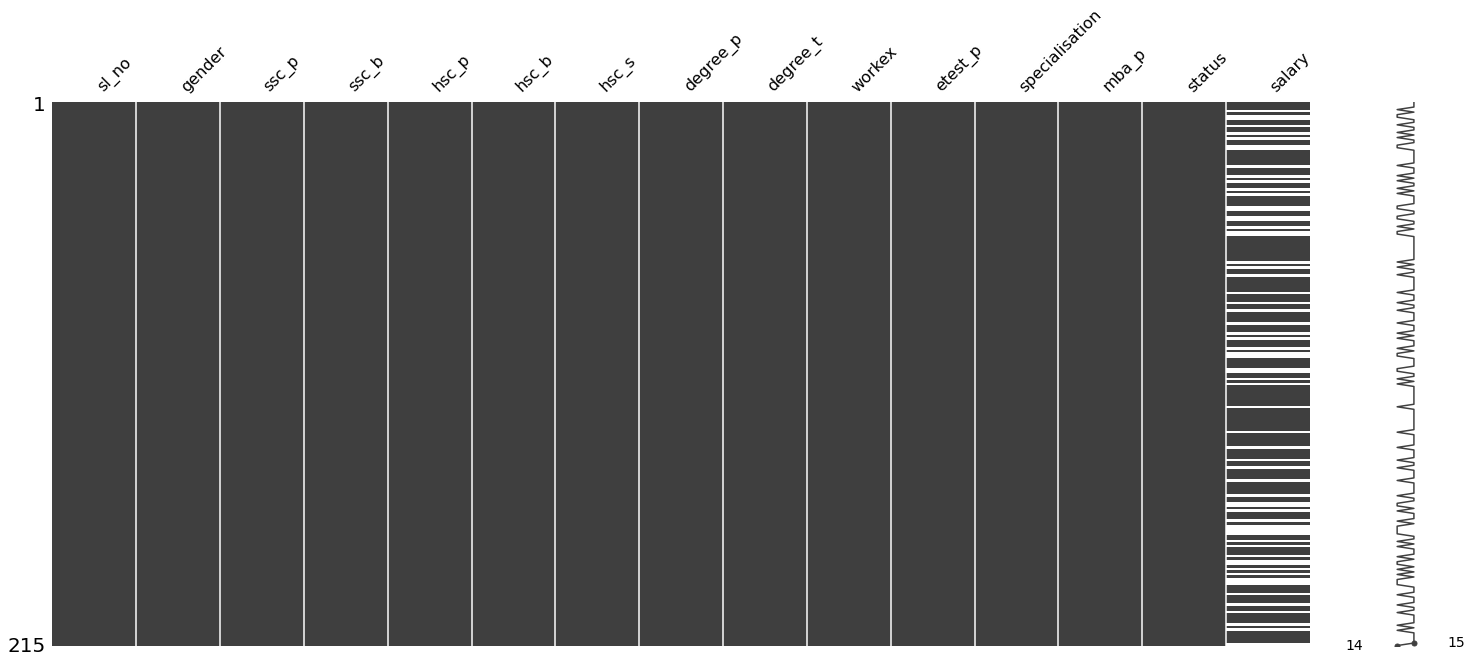

In [39]:
import missingno as msno 
msno.matrix(data)

In [40]:
data = data.drop(['sl_no'],axis =1)

# Data Manipulation

1. look at the unique values
2. change the d-ype

In [41]:
for i in data.columns:
    print(f'length of unique values in {i}',len(set(data[i])))
    print(f'some of the unique values in {i}',list(set(data[i]))[0:5])
    print('---------------------------------------------------------')

length of unique values in gender 2
some of the unique values in gender ['M', 'F']
---------------------------------------------------------
length of unique values in ssc_p 103
some of the unique values in ssc_p [40.89, 41.0, 43.0, 44.0, 45.0]
---------------------------------------------------------
length of unique values in ssc_b 2
some of the unique values in ssc_b ['Central', 'Others']
---------------------------------------------------------
length of unique values in hsc_p 97
some of the unique values in hsc_p [37.0, 39.0, 40.0, 42.16, 42.0]
---------------------------------------------------------
length of unique values in hsc_b 2
some of the unique values in hsc_b ['Central', 'Others']
---------------------------------------------------------
length of unique values in hsc_s 3
some of the unique values in hsc_s ['Science', 'Arts', 'Commerce']
---------------------------------------------------------
length of unique values in degree_p 89
some of the unique values in degree_p

In [42]:
data.loc[data['gender'] =='M', 'gender'] = 1
data.loc[data['gender'] =='F', 'gender'] = 0

for i in ['hsc_b','ssc_b']:
    data.loc[data[i] =='Central', i] = 1
    data.loc[data[i] =='Others', i] = 0

data.loc[data['hsc_s'] =='Arts', 'hsc_s'] = 0
data.loc[data['hsc_s'] =='Science', 'hsc_s'] = 1
data.loc[data['hsc_s'] =='Commerce', 'hsc_s'] = 2

data.loc[data['degree_t'] =='Comm&Mgmt', 'degree_t'] = 0
data.loc[data['degree_t'] =='Sci&Tech', 'degree_t'] = 1
data.loc[data['degree_t'] =='Others', 'degree_t'] = 2

data.loc[data['workex'] =='Yes', 'workex'] = 1
data.loc[data['workex'] =='No', 'workex'] = 0


data.loc[data['status'] =='Placed', 'status'] = 1
data.loc[data['status'] =='Not Placed', 'status'] = 0

data.loc[data['specialisation'] =='Mkt&Fin', 'specialisation'] = 1
data.loc[data['specialisation'] =='Mkt&HR', 'specialisation'] = 0

 


In [43]:
for i in data.columns:
    data[i] = pd.to_numeric(data[i],errors='coerce')


In [44]:
data.dtypes

gender              int64
ssc_p             float64
ssc_b               int64
hsc_p             float64
hsc_b               int64
hsc_s               int64
degree_p          float64
degree_t            int64
workex              int64
etest_p           float64
specialisation      int64
mba_p             float64
status              int64
salary            float64
dtype: object

In [45]:
data.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

We have missing values for **salary** Let's look at them

In [46]:
data1 = data.dropna(axis=0,subset =['salary','status'])

missing_data = data1.loc[:,['salary','status']]
missing_salary = data['salary'].isnull()
status_for_missing_values = pd.DataFrame(data['status'][missing_salary])
set(list(status_for_missing_values.status))
    

{0}

So for all missing values of salary status is not placed so we can fill salary as 0 for all missing values

In [47]:
data['salary'].fillna(value=0, inplace=True)
data.isna().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

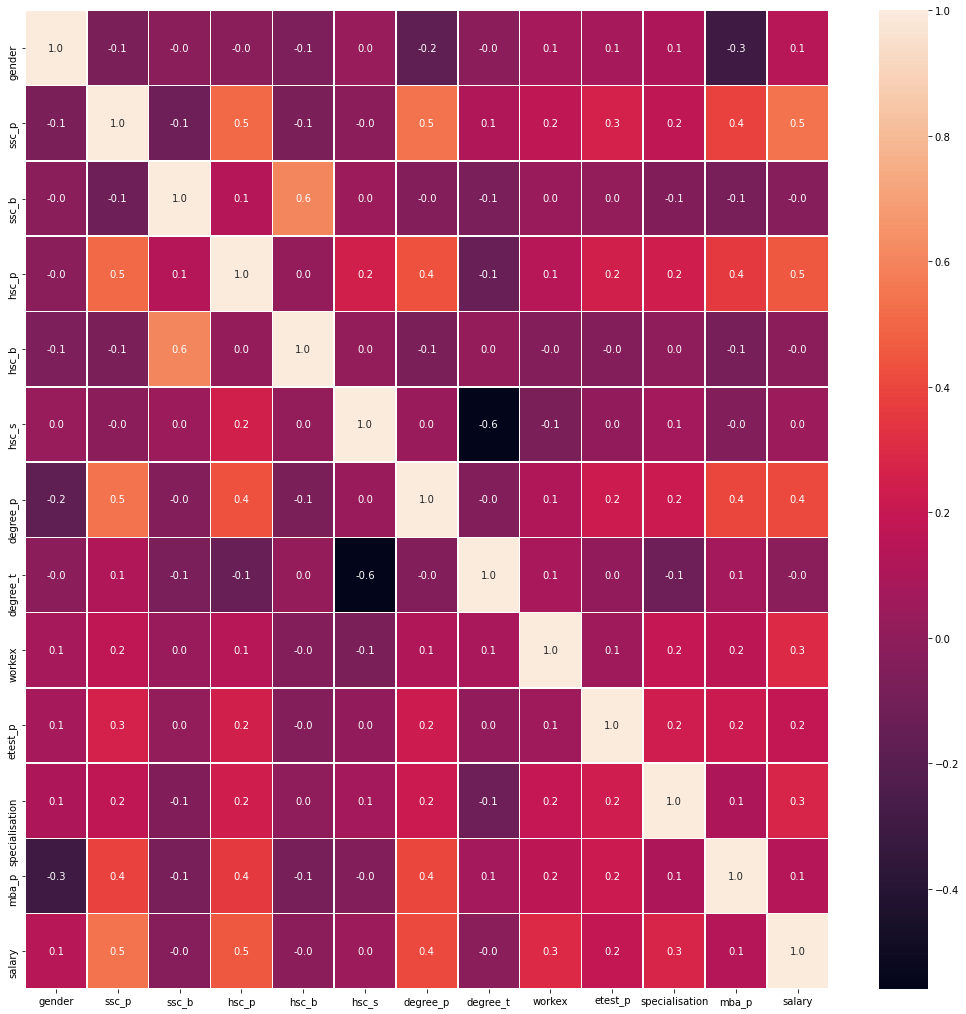

In [48]:
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(data.drop(['status'],axis =1).corr(), annot=True ,linewidth=0.5, fmt='.1f',ax=ax);

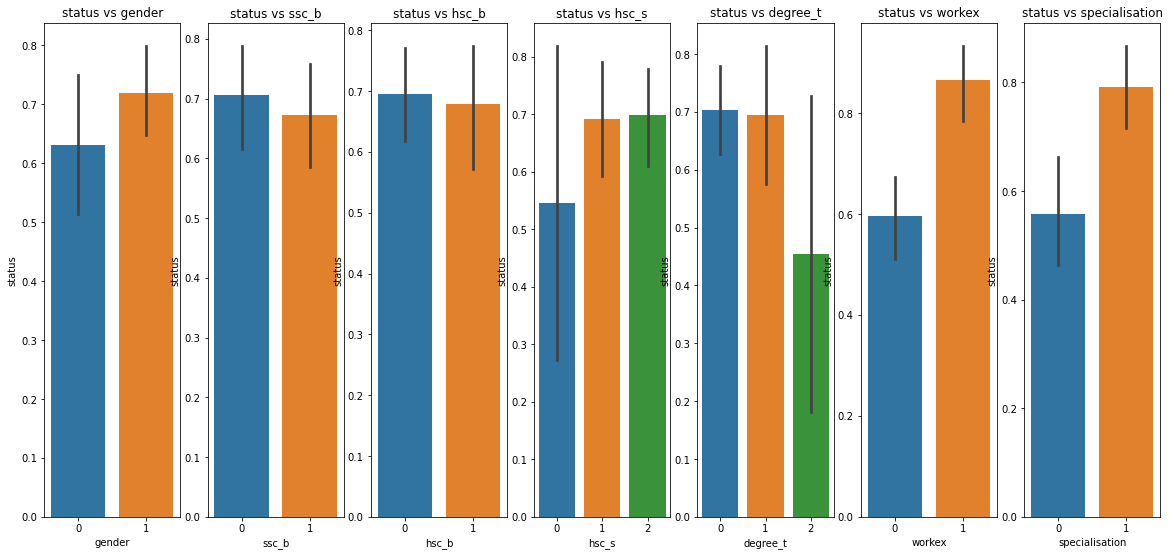

In [50]:
plt.figure(figsize=(20,20))
columns = ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation']
j =0
for i in columns:
    j +=1
    plt.subplot(2,7,j)
    sns.barplot(x= i , y=data['status'], data = data)
    plt.title(f"status vs {i}")
plt.show()

Here **gender**,**ssc_b**,**hsc_b**,**hsc_s**,**degree_t** are observed that,they are not well classifying. so,they are not selected as features.    

 **splitting the data into training and test data**

In [51]:
train_data = data[:175]
test_data = data[175:]
train_data.head()


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,0,91.00,0,2,58.00,1,0,55.0,0,58.80,1,270000.0
1,1,79.33,1,78.33,0,1,77.48,1,1,86.5,1,66.28,1,200000.0
2,1,65.00,1,68.00,1,0,64.00,0,0,75.0,1,57.80,1,250000.0
3,1,56.00,1,52.00,1,1,52.00,1,0,66.0,0,59.43,0,0.0
4,1,85.80,1,73.60,1,2,73.30,0,0,96.8,1,55.50,1,425000.0


In [52]:
y = train_data["status"]
y_test = test_data["status"]

**Random Forest Classifier**

In [53]:

features = ["workex","ssc_p","degree_p","hsc_p","specialisation",'etest_p','mba_p']

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])



#  Logistic Regression 

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(penalty= 'none' ,random_state=42 ,max_iter=150).fit(X, y)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9


              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.96      0.88      0.92        25

    accuracy                           0.90        40
   macro avg       0.89      0.91      0.90        40
weighted avg       0.91      0.90      0.90        40



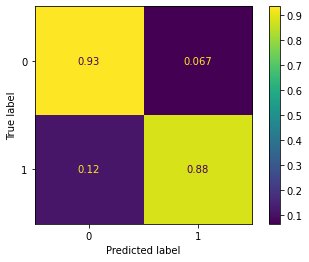

In [55]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
plot_confusion_matrix(model, X_test, y_test,labels=[0,1],normalize= 'true')
print(classification_report(y_test, y_pred, labels=[0,1]))

In [56]:
data.status.value_counts()

1    148
0     67
Name: status, dtype: int64

As the data is **Imbalanced**. it issuggested to go over f1 score ,AUC values of ROC curve ,precision and recall rather than accuracy of the model.  